<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_01_pandas_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Análisis de datos con pandas.
# Jesus D Serpa P

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


1. Leer los datos desde una página web.

In [121]:
!pip3 install -U ucimlrepo

In [122]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [123]:
url = 'https://archive.ics.uci.edu/static/public/17/data.csv'

In [124]:
df = pd.read_csv(url)
df

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M



2. Renombrar las columnas en formato PascalCase.

In [125]:
df.columns

Index(['ID', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [126]:
df.columns = pd.Series(df.columns).str.title().str.replace('_','')

In [127]:
df.columns

Index(['Id', 'Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'Diagnosis'],
      dtype='object')


3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [128]:
df.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [129]:
df.tail()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [130]:
df.describe()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 569 non-null    int64  
 1   Radius1            569 non-null    float64
 2   Texture1           569 non-null    float64
 3   Perimeter1         569 non-null    float64
 4   Area1              569 non-null    float64
 5   Smoothness1        569 non-null    float64
 6   Compactness1       569 non-null    float64
 7   Concavity1         569 non-null    float64
 8   ConcavePoints1     569 non-null    float64
 9   Symmetry1          569 non-null    float64
 10  FractalDimension1  569 non-null    float64
 11  Radius2            569 non-null    float64
 12  Texture2           569 non-null    float64
 13  Perimeter2         569 non-null    float64
 14  Area2              569 non-null    float64
 15  Smoothness2        569 non-null    float64
 16  Compactness2       569 non

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

In [132]:
df.isnull().sum()

,0
Id,0
Radius1,0
Texture1,0
Perimeter1,0
Area1,0
Smoothness1,0
Compactness1,0
Concavity1,0
ConcavePoints1,0
Symmetry1,0


A partir de esto, podemos ver que no hay ningun valor nulo en ninguna de las columnas, por lo tanto no es necesario aplicar ninguna estrategia de reemplazo.

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

In [133]:
df.Diagnosis.unique()

array(['M', 'B'], dtype=object)

Aquì mostramos que para en este caso, la columna con nombre **Diagnosis** solo tiene categorizado B para benigno y M para Maligno.


6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```


Text(0.5, 1.0, ' Conteo de cuantos casos hay de Beningo y Maligno')

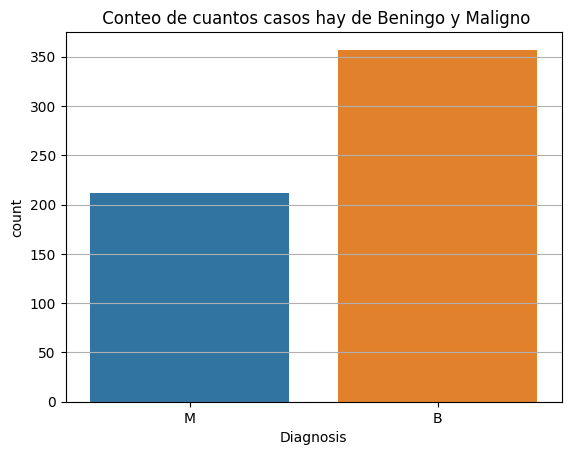

In [134]:
sns.countplot( data = df ,
              x = df.Diagnosis,
              hue = df.Diagnosis,

  )
plt.grid(axis= 'y')
plt.title(' Conteo de cuantos casos hay de Beningo y Maligno')


7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

In [135]:
df["DiagnosisNumeric"] = df["Diagnosis"].map({"B": 0, "M": 1})
df

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,1


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

In [136]:
num_cols = df.select_dtypes(include="number").columns.tolist()
num_cols = [c for c in num_cols if c.lower() not in ("id", "diagnosis")]

means = df[num_cols].mean()
stds  = df[num_cols].std(ddof=1)

df_norm = df.copy()
df_norm[num_cols] = (df[num_cols] - means) / stds

In [137]:
df_norm

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,M,1.296535
1,842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,M,1.296535
2,84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M,1.296535
3,84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M,1.296535
4,84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,M,1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,M,1.296535
565,926682,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,M,1.296535
566,926954,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,M,1.296535
567,927241,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,M,1.296535


9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


In [138]:
means = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
df['RadiusMean'] = df.loc[:,df.columns.str.startswith("Radius")].mean(axis=1)
df['PerimeterMean'] = df.loc[:,df.columns.str.startswith("Peri")].mean(axis=1)
df['PerimeterMean']

,PerimeterMean
0,105.329667
1,98.366000
2,95.695000
3,59.965000
4,97.579333
...,...
564,105.257667
565,97.134333
566,79.475000
567,110.157333


In [139]:
df2 = pd.DataFrame()
for name in means:
  df2[name] =  df_norm.loc[:,df_norm.columns.str.startswith(name[:4])].mean(axis=1)

In [140]:
df2

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827691,1.827691,2.037172,1.698454
1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,0.213814,0.213814,-0.349009,-0.228767
2,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,1.306948,1.306948,0.775643,0.032286
3,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.576530,1.576530,4.544703,3.960995
4,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,1.018207,1.018207,-0.412639,-0.153272
...,...,...,...,...,...,...,...,...,...,...
564,2.262762,0.303132,2.062496,2.319074,0.834796,0.045809,1.547820,1.547820,-0.936231,-0.490281
565,1.512694,2.129283,1.397014,1.502133,-0.337297,-0.160662,0.664040,0.664040,-0.312618,-0.840309
566,0.482422,1.053425,0.509009,0.395171,-0.675876,0.324159,0.335735,0.335735,-0.934205,-0.392078
567,1.651053,1.751949,1.906541,1.464675,0.926916,3.062208,2.253252,2.253252,1.459686,1.387908



10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.


Text(0.5, 1.0, ' Conteo de cuantos casos hay de Beningo y Maligno')

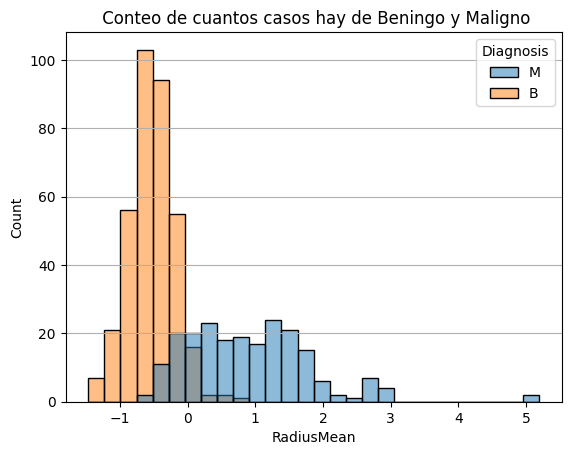

In [141]:
sns.histplot( data = df2,
              x = df2.RadiusMean,
              hue = df.Diagnosis
  )
plt.grid(axis= 'y')
plt.title(' Conteo de cuantos casos hay de Beningo y Maligno')

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


In [142]:
df2['DiagnosisNumeric'] = df['DiagnosisNumeric']
df2.shape

(569, 11)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactnessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavePointsMean'),
  Text(8, 0, 'SymmetryMean'),
  Text(9, 0, 'FractalDimensionMean')])

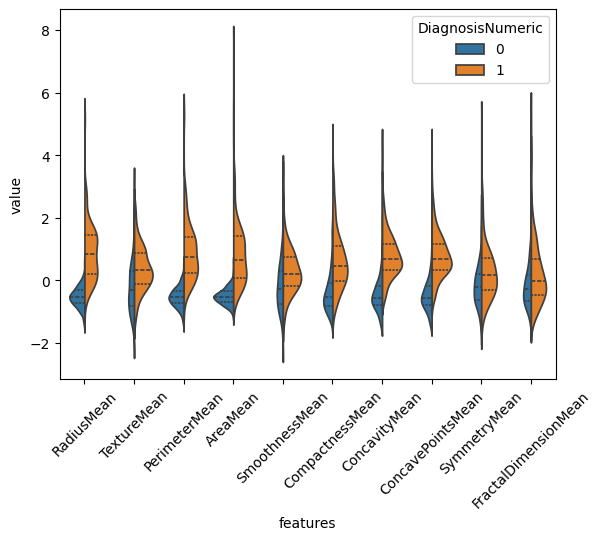

In [143]:
data = pd.melt(df2.iloc[:, 0:11], id_vars= 'DiagnosisNumeric', var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="DiagnosisNumeric", data=data, split=True, inner="quart")
plt.xticks(rotation=45)


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```




<Axes: title={'center': 'RadiusMean'}, xlabel='DiagnosisNumeric'>

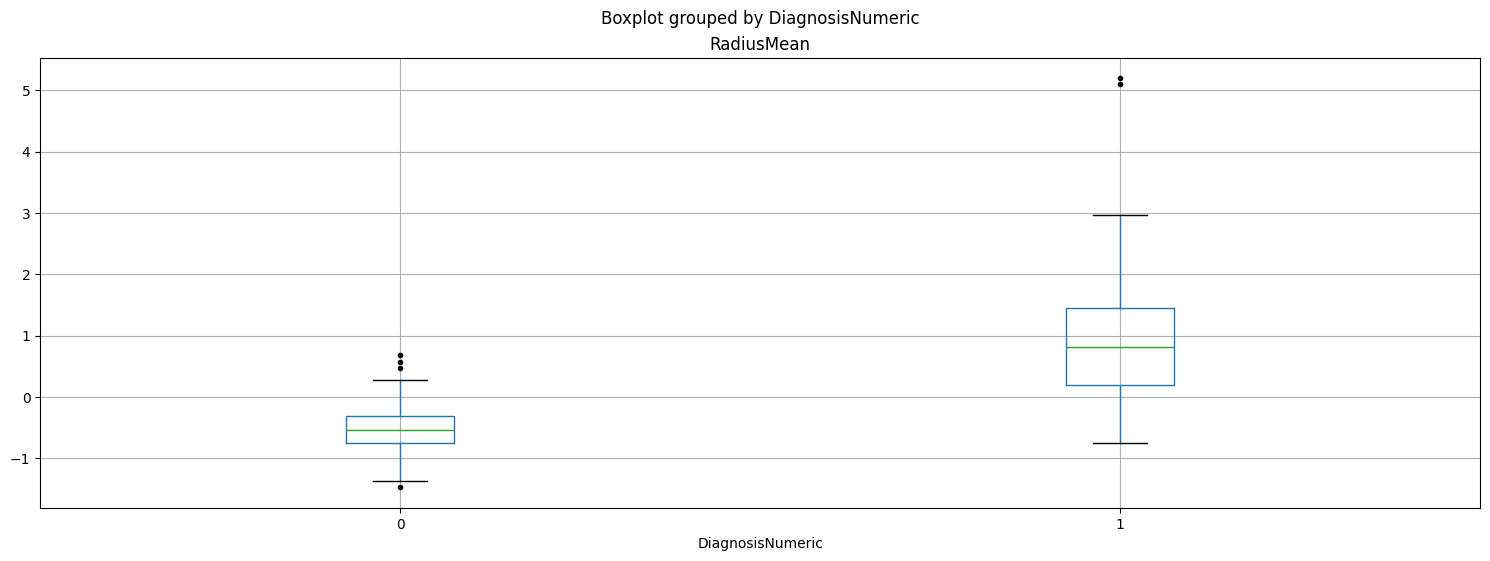

In [144]:
df2.boxplot(column="RadiusMean", by='DiagnosisNumeric', sym='k.', figsize=(18,6))

Outliers removidos: 6


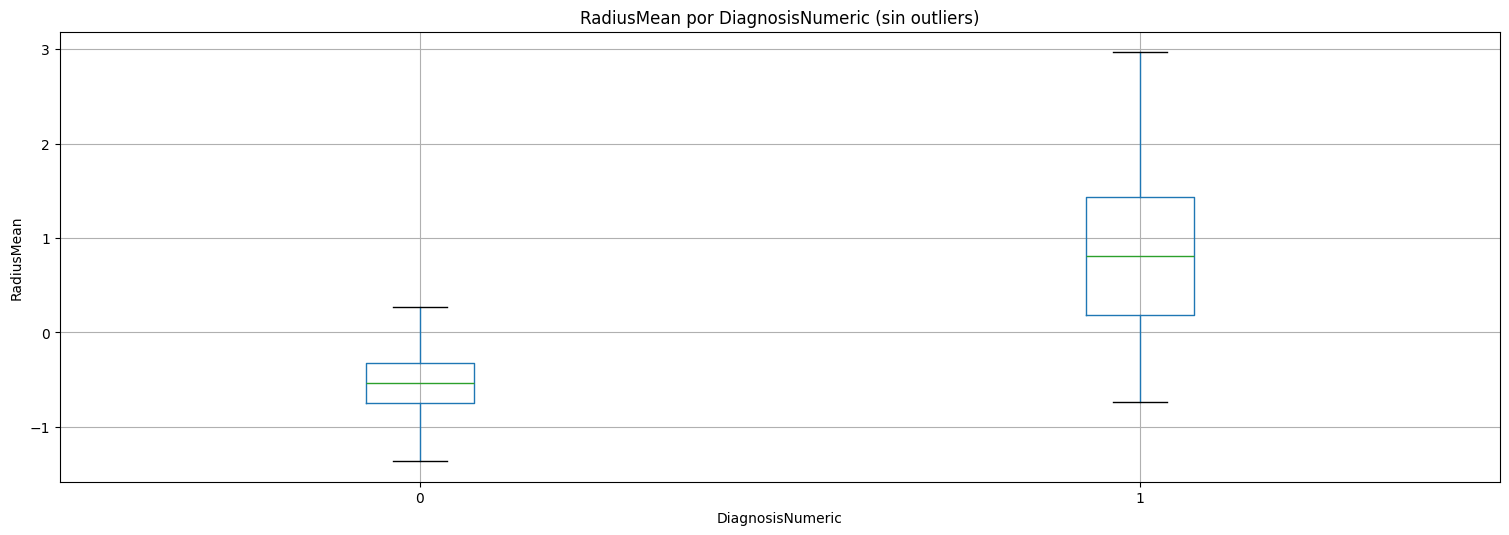

In [147]:
def iqr_mask(s: pd.Series) -> pd.Series:
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return (s >= q1 - 1.5*iqr) & (s <= q3 + 1.5*iqr)

mask_by_class = df2.groupby("DiagnosisNumeric")["RadiusMean"].transform(iqr_mask).astype(bool)
print("Outliers removidos:", (~mask_by_class).sum())


df2_no_out = df2.loc[mask_by_class].copy()


ax = df2_no_out.boxplot(
    column="RadiusMean",
    by="DiagnosisNumeric",
    sym="",
    figsize=(18,6)
)
plt.title("RadiusMean por DiagnosisNumeric (sin outliers)")
plt.suptitle("")
plt.xlabel("DiagnosisNumeric")
plt.ylabel("RadiusMean")
plt.show()


13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.


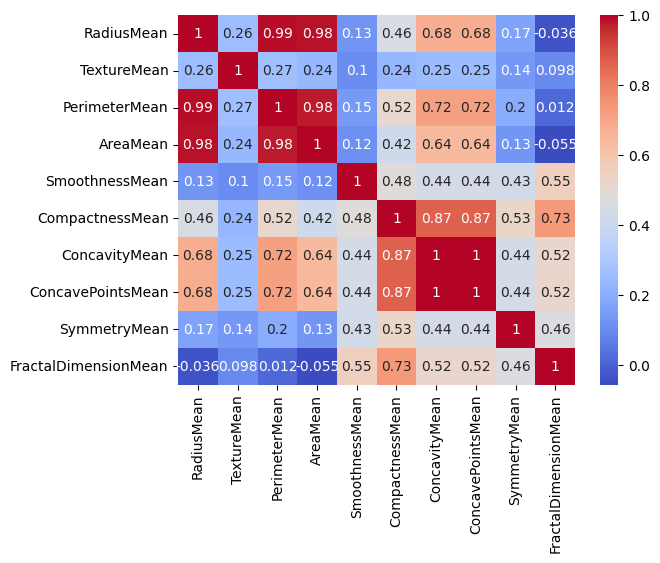

In [146]:
corr = df2[['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Pairplot (matriz de dispersión): visualiza todas las relaciones bivariadas y las distribuciones univariadas a la vez, separando por diagnóstico. Útil para notar separaciones entre B/M y patrones no lineales.

Jointplot (dispersión con densidades marginales): profundiza en una pareja de variables clave (por ejemplo, RadiusMean vs. AreaMean) y muestra cómo se distribuyen por clase.

Hexbin (mapa hexagonal de densidad): alternativa al scatter cuando hay mucha superposición de puntos; resalta zonas de mayor concentración.

Boxenplots (letter–value plots): parecidos al boxplot, pero con más detalle en las colas de la distribución; útiles para detectar asimetrías y outliers.
